In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency, ttest_ind

In [6]:
df= pd.read_csv('df_final.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           438557 non-null  int64  
 1   ID                   438557 non-null  int64  
 2   CODE_GENDER          438557 non-null  object 
 3   FLAG_OWN_CAR         438557 non-null  object 
 4   FLAG_OWN_REALTY      438557 non-null  object 
 5   CNT_CHILDREN         438557 non-null  int64  
 6   AMT_INCOME_TOTAL     438557 non-null  float64
 7   NAME_INCOME_TYPE     438557 non-null  object 
 8   NAME_EDUCATION_TYPE  438557 non-null  object 
 9   NAME_FAMILY_STATUS   438557 non-null  object 
 10  NAME_HOUSING_TYPE    438557 non-null  object 
 11  DAYS_BIRTH           438557 non-null  int64  
 12  DAYS_EMPLOYED        438557 non-null  int64  
 13  FLAG_MOBIL           438557 non-null  int64  
 14  FLAG_WORK_PHONE      438557 non-null  int64  
 15  FLAG_PHONE       

In [8]:
x=df.drop(['Unnamed: 0','Target'], axis = 1)
y=df['Target']

In [9]:
credit_defaulter = df[df['Target']==0]
no_defaulter = df[df['Target']==1]
dff = df

In [10]:
credit_defaulter.shape

(553, 20)

## Relationship between Income amount and Loan default

C:\Users\cmhas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cmhas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Non Defaulter income distribution')

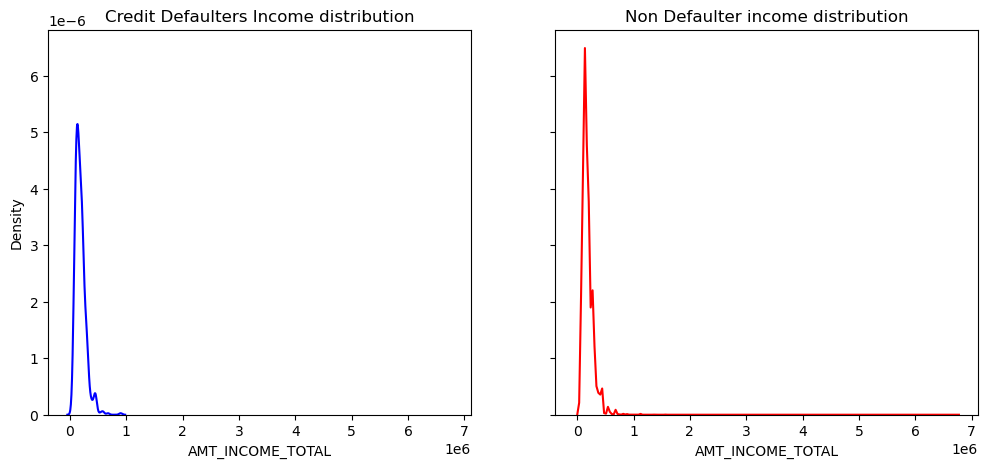

In [12]:
fig, axes = plt.subplots(1, 2, sharey=True, sharex = True, figsize=(12, 5))
sns.kdeplot(data=credit_defaulter, x='AMT_INCOME_TOTAL', ax=axes[0], color = 'blue')
axes[0].set_title('Credit Defaulters Income distribution')

sns.kdeplot(data=no_defaulter, x='AMT_INCOME_TOTAL', ax=axes[1], color = 'red')
axes[1].set_title('Non Defaulter income distribution')

In [13]:
# T test for income

default_income = df[df['Target']==0]['AMT_INCOME_TOTAL']
no_default_income = df[df['Target']==1]['AMT_INCOME_TOTAL']
tstat, pvalue = ttest_ind(default_income, no_default_income, equal_var= False)
print(tstat, pvalue)

-0.012100328723033545 0.9903499272938381


In [14]:
# H0 : There is no difference between the income of Defaulters and non defaulters
#H1 : There is difference between the incomes of Defaulters and non defaulters

# Pvalue > 0.05 -> Failure to reject the null hypothesis


#There is no difference between the incomes of both categories.

## Impact of DOB (Age) on Credit default 

C:\Users\cmhas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cmhas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DAYS_BIRTH', ylabel='Density'>

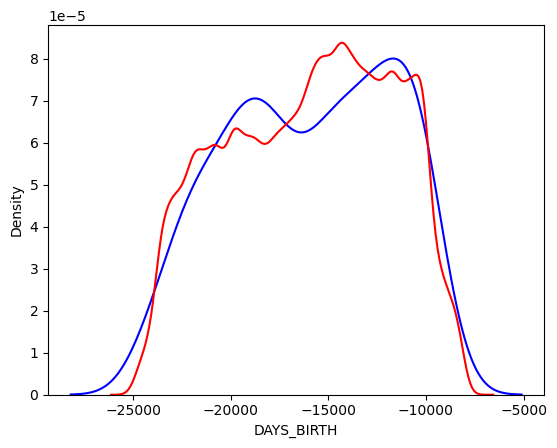

In [16]:
sns.kdeplot(data=credit_defaulter, x='DAYS_BIRTH', color = 'blue')
sns.kdeplot(data=no_defaulter, x='DAYS_BIRTH', color = 'red')

In [17]:
# T test for DOB

default_DOB = df[df['Target']==0]['DAYS_BIRTH']
no_default_DOB = df[df['Target']==1]['DAYS_BIRTH']
tstat, pvalue = ttest_ind(default_DOB, no_default_DOB, equal_var= False)
print(tstat, pvalue)

0.2368577215816113 0.8128548248540316


In [18]:
# H0 : No relation between DOB and credit default
# H1 : There is relation between DOB and credit default

# pvalue > 0.05 -> Failure to reject the H0; There is no relation between DOB & Credit default

## Impact of Experience (Days employed) on Credit default

C:\Users\cmhas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cmhas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DAYS_EMPLOYED', ylabel='Density'>

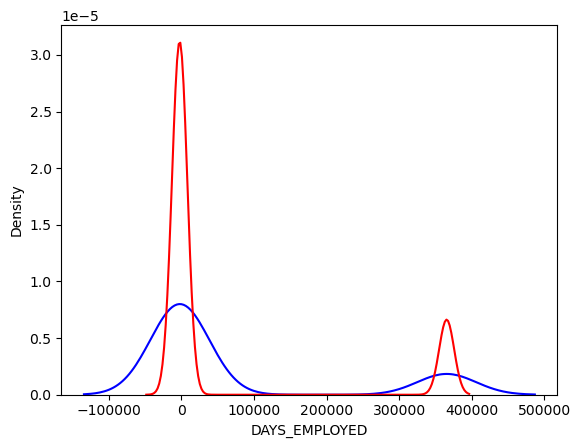

In [20]:
# Distribution of Days Employed

sns.kdeplot(data=credit_defaulter, x='DAYS_EMPLOYED', color = 'blue')
sns.kdeplot(data=no_defaulter, x='DAYS_EMPLOYED', color = 'red')

In [21]:
# T test for Experince

default_Exp = df[df['Target']==0]['DAYS_EMPLOYED']
no_default_Exp = df[df['Target']==1]['DAYS_EMPLOYED']
tstat, pvalue = ttest_ind(default_Exp, no_default_Exp, equal_var= False)
print(tstat, pvalue)

0.9246107570855497 0.35557147295102054


## Number of Children

C:\Users\cmhas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cmhas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CNT_CHILDREN', ylabel='Density'>

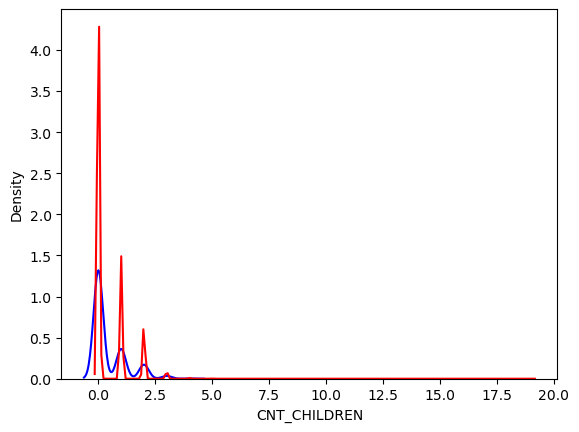

In [23]:
# Number of children among defaulters and non defaulters

sns.kdeplot(data=credit_defaulter, x='CNT_CHILDREN', color = 'blue')
sns.kdeplot(data=no_defaulter, x='CNT_CHILDREN', color = 'red')

In [24]:
df.CNT_CHILDREN.value_counts(normalize = True)

CNT_CHILDREN
0     0.693344
1     0.201860
2     0.090944
3     0.012382
4     0.001108
5     0.000303
7     0.000021
9     0.000011
12    0.000009
6     0.000009
14    0.000007
19    0.000002
Name: proportion, dtype: float64

C:\Users\cmhas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cmhas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CNT_FAM_MEMBERS', ylabel='Density'>

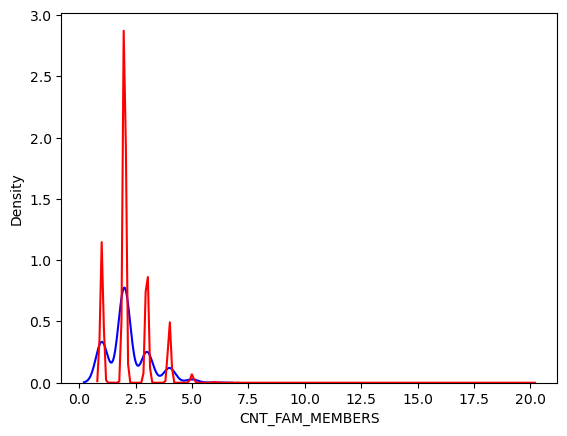

In [25]:
# Number of Family members among defaulters and non defaulters

sns.kdeplot(data=credit_defaulter, x='CNT_FAM_MEMBERS', color = 'blue')
sns.kdeplot(data=no_defaulter, x='CNT_FAM_MEMBERS', color = 'red')

In [26]:
df.CNT_FAM_MEMBERS.value_counts(normalize = True)

CNT_FAM_MEMBERS
2.0     0.533320
1.0     0.192659
3.0     0.175868
4.0     0.085179
5.0     0.011586
6.0     0.001047
7.0     0.000283
9.0     0.000021
11.0    0.000011
14.0    0.000009
8.0     0.000009
15.0    0.000007
20.0    0.000002
Name: proportion, dtype: float64

In [27]:
### Approach for Number of children and Number of family members:

# Number of children are a subset of number of family members.
# As a result it is better to drop the number of children columns as it is already represented in the number of family columns
# Also number of family columns have few outlier contributing to less than 1% data.
    #Here outliers at best can be capped at 5 members in family. All values higher than 5 are capped at 5.

Text(0.5, 1.0, 'Car ownership among defaulters')

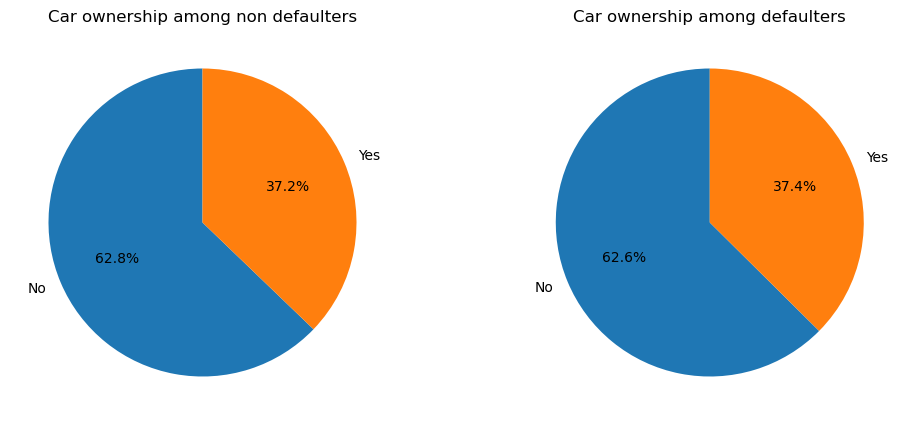

In [28]:
# Distribution of Car ownership amongdefaulters and non defaulters


fig, axes = plt.subplots(1, 2, sharex = True, figsize=(12, 5))

axes[0].pie(x= no_defaulter['FLAG_OWN_CAR'].value_counts(normalize = True),
            startangle= 90, autopct = '%1.1f%%', labels = ['No', 'Yes'])
axes[0].set_title('Car ownership among non defaulters')

axes[1].pie(x= credit_defaulter['FLAG_OWN_CAR'].value_counts(normalize = True), 
            startangle= 90, autopct = '%1.1f%%',labels = ['No', 'Yes'])
axes[1].set_title('Car ownership among defaulters')

In [29]:
# Car ownsherp is almost the same among defaulters and non-defaulters. 

Text(0.5, 1.0, 'Realty ownership among defaulters')

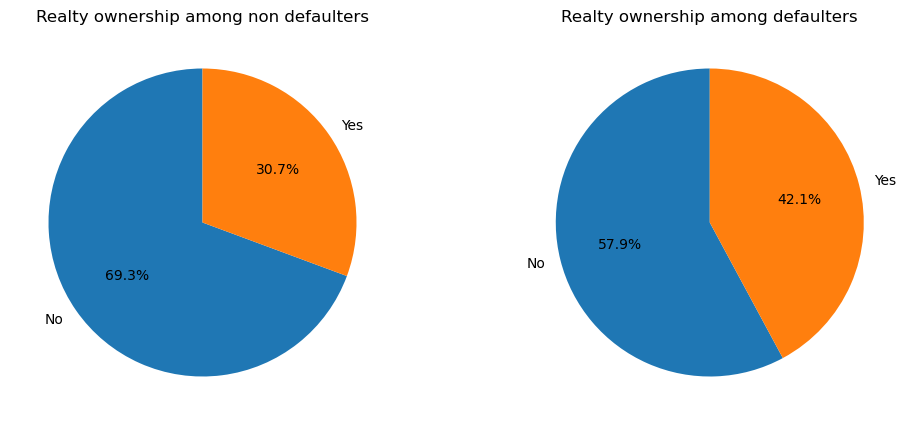

In [30]:
# Distribution of Realty ownership amongdefaulters and non defaulters

fig, axes = plt.subplots(1, 2, sharex = True, figsize=(12, 5))

axes[0].pie(x= no_defaulter['FLAG_OWN_REALTY'].value_counts(normalize = True),
            startangle= 90, autopct = '%1.1f%%', labels = ['No', 'Yes'])
axes[0].set_title('Realty ownership among non defaulters')

axes[1].pie(x= credit_defaulter['FLAG_OWN_REALTY'].value_counts(normalize = True), 
            startangle= 90, autopct = '%1.1f%%',labels = ['No', 'Yes'])
axes[1].set_title('Realty ownership among defaulters')

In [31]:
# A higher share of customers owning realty were among defaulters than non defaulters.

Text(0.5, 1.0, 'Credit defaulters by Gender')

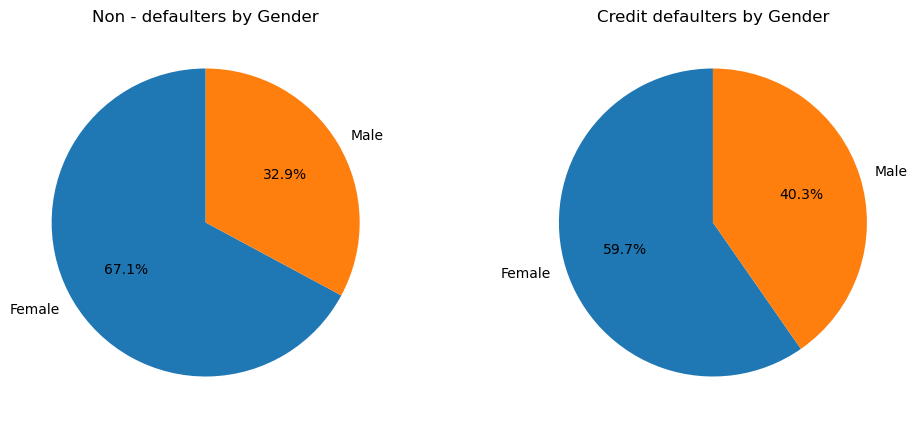

In [32]:
# Variation of Gender among Defaulters and non defaulters.

fig, axes = plt.subplots(1, 2, sharex = True, figsize=(12, 5))

axes[0].pie(x= no_defaulter['CODE_GENDER'].value_counts(normalize = True), startangle= 90, autopct = '%1.1f%%', labels = ['Female','Male'] )
axes[0].set_title('Non - defaulters by Gender')

axes[1].pie(x= credit_defaulter['CODE_GENDER'].value_counts(normalize = True), startangle= 90, autopct = '%1.1f%%',labels = ['Female','Male'] )
axes[1].set_title('Credit defaulters by Gender')

In [33]:
cross_tab_Gender = pd.crosstab(index = dff['Target'], columns = dff['CODE_GENDER'])
Chi2_Gender = chi2_contingency(cross_tab_Gender)
Chi2_Gender.pvalue

0.00022089990524641967

In [34]:
#H0 : No correlation between Gender and loan default
#H1 : There is correlation between Gender and loan default

# Pvalue <0.05 : Reject the null hypothesis. -> THere is statistically significant correlation between the Gender and Loan default.

In [35]:
# Compute Cramér’s V
n = cross_tab_Gender.sum().sum()
min_dim = min(cross_tab_Gender.shape) - 1
cramers_v = np.sqrt(Chi2_Gender[0] / (n * min_dim))
print(cramers_v)

0.005577814896607621


In [36]:
# Cramers V value <0.1 -> Very weak correlation between Gender and loan default.
#A higher share of men are among credit defaulters than females.

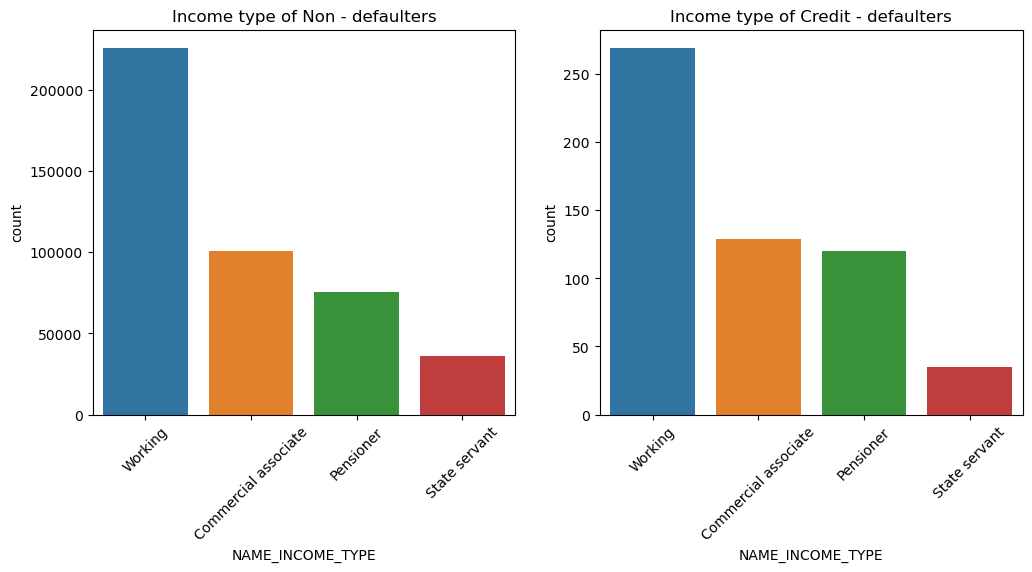

In [37]:
fig, axes = plt.subplots(1, 2, sharex = True, figsize=(12, 5))

sns.countplot(data=no_defaulter, x = 'NAME_INCOME_TYPE', ax=axes[0], order=no_defaulter['NAME_INCOME_TYPE'].value_counts().index)
axes[0].set_title('Income type of Non - defaulters')
axes[0].tick_params(axis='x', rotation = 45)

sns.countplot(data=credit_defaulter, x = 'NAME_INCOME_TYPE', ax=axes[1], order=credit_defaulter['NAME_INCOME_TYPE'].value_counts().index)
axes[1].set_title('Income type of Credit - defaulters')
axes[1].tick_params(axis='x', rotation = 45)

In [38]:
cross_tab_Income_type = pd.crosstab(index = dff['Target'], columns = dff['NAME_INCOME_TYPE'])
Chi2_Income = chi2_contingency(cross_tab_Income_type)
Chi2_Income

Chi2ContingencyResult(statistic=9.91422384640768, pvalue=0.04189762500095075, dof=4, expected_freq=array([[1.27049895e+02, 9.51931653e+01, 4.56288647e+01, 2.14362101e-02,
        2.85106638e+02],
       [1.00629950e+05, 7.53978068e+04, 3.61403711e+04, 1.69785638e+01,
        2.25818893e+05]]))

In [39]:
#H0 : No correlation between Income type and loan default
#H1 : There is correlation between Income type and loan default

# Pvalue <0.05 : Reject the null hypothesis. -> THere is statistically significant correlation between the Income type and Loan default.


### crammers V test 
- to asses the extent of correlation between income type and loan default


In [41]:
# Compute Cramér’s V
n = cross_tab_Income_type.sum().sum()
min_dim = min(cross_tab_Income_type.shape) - 1
cramers_v = np.sqrt(Chi2_Income[0] / (n * min_dim))
print(cramers_v)

0.004754625732483597


In [42]:
# Cramers value < 0.1 -> Very weak correaltion

Text(0.5, 1.0, 'Credit defaulters Income type')

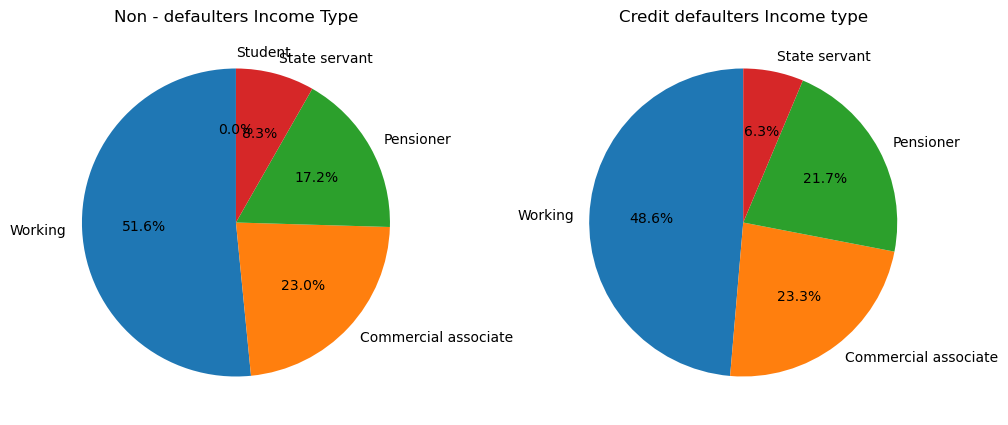

In [43]:
# Impact of Income type in credit default


fig, axes = plt.subplots(1, 2, sharex = True, figsize=(12, 5))
labels = ['Working', 'Commerical Assosciate', 'Pensioner', 'State servant']

axes[0].pie(x= no_defaulter['NAME_INCOME_TYPE'].value_counts(normalize = True), startangle= 90, autopct = '%1.1f%%', labels = no_defaulter['NAME_INCOME_TYPE'].unique() )
axes[0].set_title('Non - defaulters Income Type')

axes[1].pie(x= credit_defaulter['NAME_INCOME_TYPE'].value_counts(normalize = True), startangle= 90, autopct = '%1.1f%%', labels = credit_defaulter['NAME_INCOME_TYPE'].unique() )
axes[1].set_title('Credit defaulters Income type')

In [44]:
# Pensioners are more prone to credit default while working class are less prone to credit default.
# Commercial assosciates and State servant have almost identical distribution in both categories.
# No students are found in default category

## Impaact of Occupation type on loan default

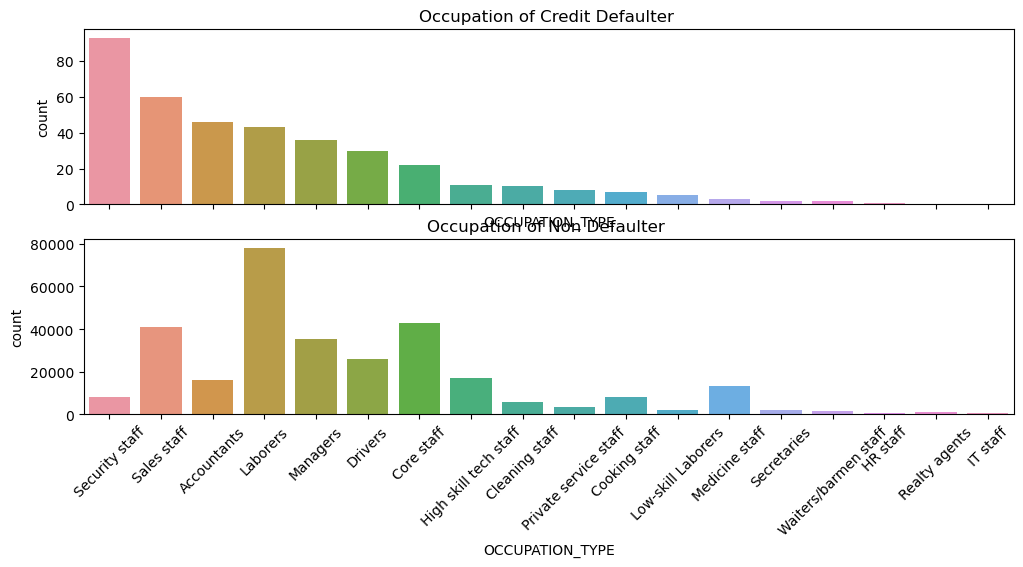

In [46]:


fig, axes = plt.subplots(2, 1, sharex = True, figsize=(12,5))
sns.countplot(data = credit_defaulter, x = 'OCCUPATION_TYPE', ax = axes[0], order=credit_defaulter['OCCUPATION_TYPE'].value_counts().index)
axes[0].tick_params(axis='x', rotation = 45)
axes[0].set_title('Occupation of Credit Defaulter ')

sns.countplot(data = no_defaulter, x = 'OCCUPATION_TYPE', ax = axes[1])
axes[1].set_title('Occupation of Non Defaulter ')
axes[1].tick_params(axis='x', rotation = 45)

In [47]:
cross_tab_Occupation_type = pd.crosstab(index = df['Target'], columns = df['OCCUPATION_TYPE'])
Chi2_Occupation = chi2_contingency(cross_tab_Occupation_type)
Chi2_Occupation

Chi2ContingencyResult(statistic=35.41889117092252, pvalue=0.005478684649983126, dof=17, expected_freq=array([[1.99054883e+01, 7.27854735e+00, 1.00567234e+01, 5.35549163e+01,
        3.24888452e+01, 9.63831591e-01, 2.15293080e+01, 7.52137314e-01,
        9.74291779e+01, 2.66485737e+00, 4.41905577e+01, 1.68359213e+01,
        4.30362013e+00, 1.29631613e+00, 5.11777141e+01, 2.54531237e+00,
        9.95336680e+00, 2.07335865e+00],
       [1.59650945e+04, 5.83772145e+03, 8.06594328e+03, 4.29534451e+04,
        2.60575112e+04, 7.73036168e+02, 1.72674707e+04, 6.03247863e+02,
        7.81425708e+04, 2.13733514e+03, 3.54428094e+04, 1.35031641e+04,
        3.45169638e+03, 1.03970368e+03, 4.10468223e+04, 2.04145469e+03,
        7.98304663e+03, 1.66292664e+03]]))

In [48]:
#H0 : No correlation between Income type and loan default
#H1 : There is correlation between Income type and loan default

# Pvalue >0.05 : Fail to Reject the null hypothesis. -> THere is NO  statistically significant correlation between the Occupation type and Loan default.


In [49]:
# Higher share of defaulters among security staff while lower share for labourers.
# Limiting the occupationn type into top 7 categories. Others are labelled as 'Others'.

major_occup = no_defaulter.OCCUPATION_TYPE.value_counts().head(7).index
major_occup
dff['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply( lambda x:x if x in major_occup else 'Others' )

In [50]:
dff.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Others                   181361
Laborers                  78240
Core staff                43007
Sales staff               41098
Managers                  35487
Drivers                   26090
High skill tech staff     17289
Accountants               15985
Name: count, dtype: int64

## Family member count

In [52]:
dff['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].apply( lambda x : x if (x<=7) else 5)
print('Before Transformation\n',df.CNT_FAM_MEMBERS.describe())
print('\n\n After Transformation \n',dff.CNT_FAM_MEMBERS.describe())

Before Transformation
 count    438557.000000
mean          2.194102
std           0.894533
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           7.000000
Name: CNT_FAM_MEMBERS, dtype: float64


 After Transformation 
 count    438557.000000
mean          2.194102
std           0.894533
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           7.000000
Name: CNT_FAM_MEMBERS, dtype: float64


In [53]:
# mean and median values for Family member count remain unchanged after the transformation

In [54]:
df.NAME_EDUCATION_TYPE.value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: count, dtype: int64

## Impact of Education type in credit default

Text(0.5, 1.0, 'Credit defaulters')

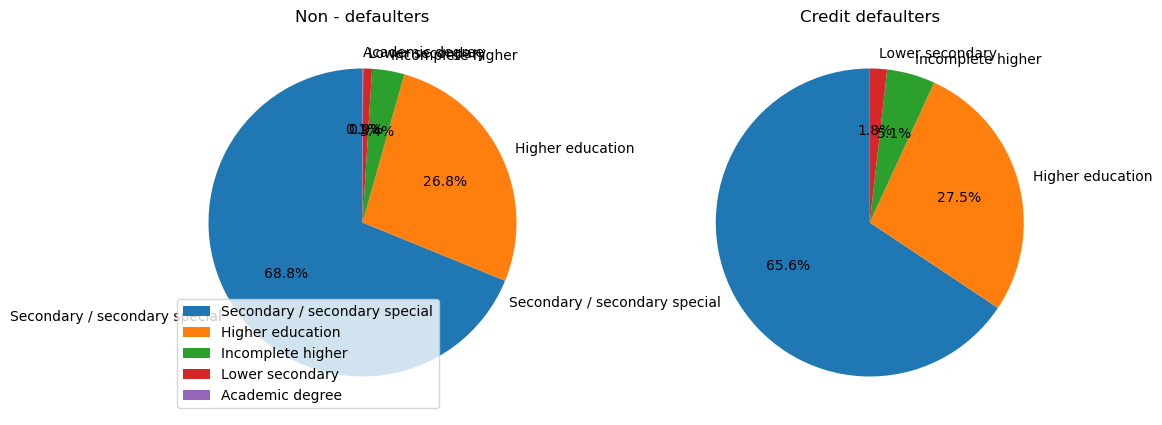

In [56]:

fig, axes = plt.subplots(1, 2, sharex = True, figsize=(12, 5))


axes[0].pie(x= no_defaulter['NAME_EDUCATION_TYPE'].value_counts(normalize = True), startangle= 90, autopct = '%1.1f%%',
           labels = no_defaulter.NAME_EDUCATION_TYPE.value_counts().index)
           
axes[0].set_title('Non - defaulters')
axes[0].legend()

axes[1].pie(x= credit_defaulter['NAME_EDUCATION_TYPE'].value_counts(normalize = True), startangle= 90, autopct = '%1.1f%%',
           labels = credit_defaulter.NAME_EDUCATION_TYPE.value_counts().index)
axes[1].set_title('Credit defaulters')

In [57]:
# Secondary school had lower credit defaulters and Academic degree holders had no defaulters
# A slightly higher number of Higher educated and lower secondary educated were among defaulters

## Impact of Family status in credit default

Text(0.5, 1.0, 'Credit defaulters Family status')

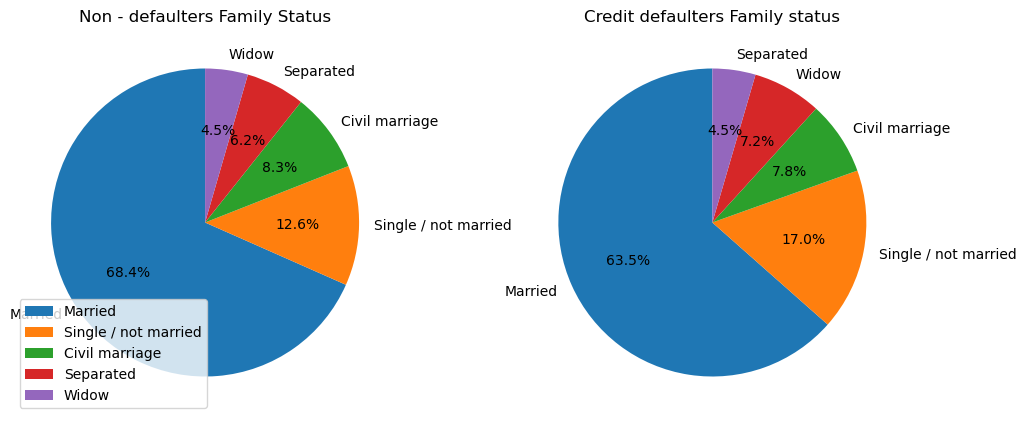

In [59]:
fig, axes = plt.subplots(1, 2, sharex = True, figsize=(12, 5))


axes[0].pie(x= no_defaulter['NAME_FAMILY_STATUS'].value_counts(normalize = True), startangle= 90, autopct = '%1.1f%%',
           labels = no_defaulter.NAME_FAMILY_STATUS.value_counts().index)
           
axes[0].set_title('Non - defaulters Family Status')
axes[0].legend()

axes[1].pie(x= credit_defaulter['NAME_FAMILY_STATUS'].value_counts(normalize = True), startangle= 90, autopct = '%1.1f%%',
           labels = credit_defaulter.NAME_FAMILY_STATUS.value_counts().index)
axes[1].set_title('Credit defaulters Family status')

In [60]:
# High impact independent variable.
# Lower default among married  while more default among Single/not married and widow. Slightly higher share of defaulter civil marriage.

## Impact of Housing type in credit default

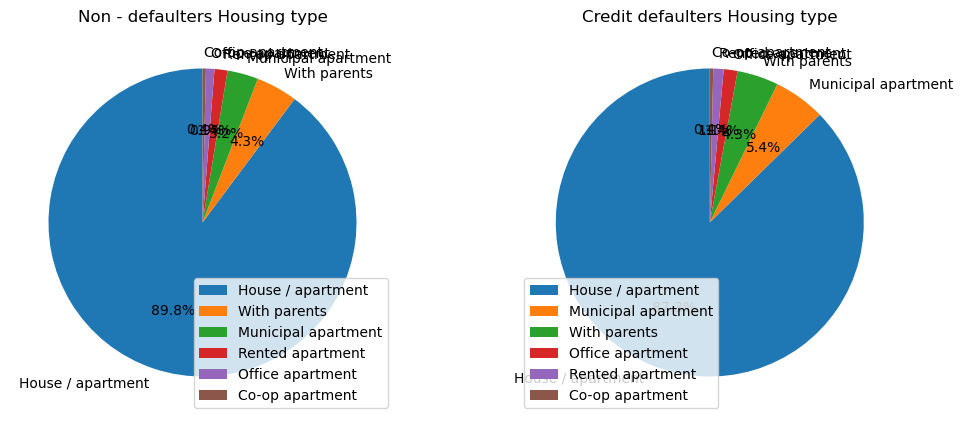

In [62]:

fig, axes = plt.subplots(1, 2, sharex = True, figsize=(12, 5))


axes[0].pie(x= no_defaulter['NAME_HOUSING_TYPE'].value_counts(normalize = True), startangle= 90, autopct = '%1.1f%%',
           labels = no_defaulter.NAME_HOUSING_TYPE.value_counts().index)
           
axes[0].set_title('Non - defaulters Housing type')
axes[0].legend()

axes[1].pie(x= credit_defaulter['NAME_HOUSING_TYPE'].value_counts(normalize = True), startangle= 90, autopct = '%1.1f%%',
           labels = credit_defaulter.NAME_HOUSING_TYPE.value_counts().index)
axes[1].set_title('Credit defaulters Housing type')
axes[1].legend()

In [63]:
print('Non Defaulters \n',no_defaulter.NAME_HOUSING_TYPE.value_counts(normalize = True))
print('\n\n\n Credit Defaulter \n',credit_defaulter.NAME_HOUSING_TYPE.value_counts(normalize = True))

Non Defaulters 
 NAME_HOUSING_TYPE
House / apartment      0.898047
With parents           0.043500
Municipal apartment    0.032383
Rented apartment       0.013625
Office apartment       0.008936
Co-op apartment        0.003509
Name: proportion, dtype: float64



 Credit Defaulter 
 NAME_HOUSING_TYPE
House / apartment      0.873418
Municipal apartment    0.054250
With parents           0.043400
Office apartment       0.014467
Rented apartment       0.010850
Co-op apartment        0.003617
Name: proportion, dtype: float64


In [64]:
# Appears to have little impact.
# House/Apartment holders have lower default while living in Muncipal apartments have higher default.

## Impact of Phone Flag in credit default

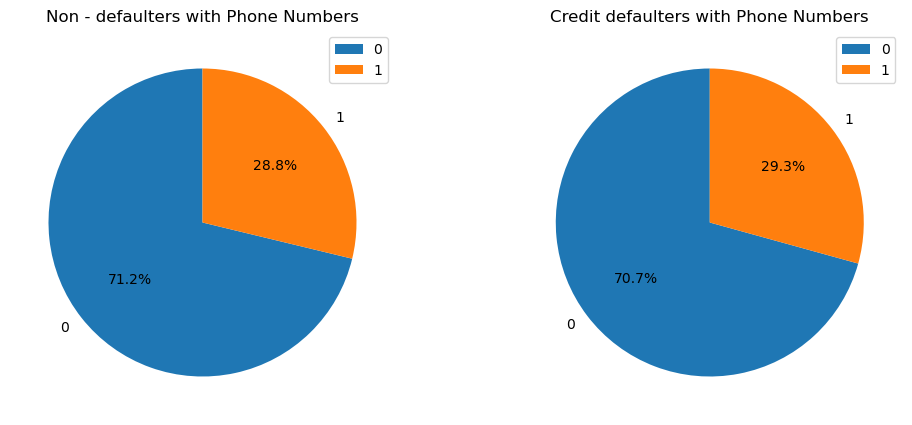

In [66]:
fig, axes = plt.subplots(1, 2, sharex = True, figsize=(12, 5))


axes[0].pie(x= no_defaulter['FLAG_PHONE'].value_counts(normalize = True), startangle= 90, autopct = '%1.1f%%',
           labels = no_defaulter.FLAG_PHONE.value_counts().index)
           
axes[0].set_title('Non - defaulters with Phone Numbers')
axes[0].legend()

axes[1].pie(x= credit_defaulter['FLAG_PHONE'].value_counts(normalize = True), startangle= 90, autopct = '%1.1f%%',
           labels = credit_defaulter.FLAG_PHONE.value_counts().index)
axes[1].set_title('Credit defaulters with Phone Numbers')
axes[1].legend()

In [67]:
x = dff.drop(labels = ['Unnamed: 0', 'ID', 'CNT_CHILDREN', 'Target' ], axis = 1)
y = dff.Target

In [68]:
x = x.drop(labels = ['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], axis = 1)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          438557 non-null  object 
 1   FLAG_OWN_CAR         438557 non-null  object 
 2   FLAG_OWN_REALTY      438557 non-null  object 
 3   AMT_INCOME_TOTAL     438557 non-null  float64
 4   NAME_INCOME_TYPE     438557 non-null  object 
 5   NAME_EDUCATION_TYPE  438557 non-null  object 
 6   NAME_FAMILY_STATUS   438557 non-null  object 
 7   NAME_HOUSING_TYPE    438557 non-null  object 
 8   DAYS_BIRTH           438557 non-null  int64  
 9   DAYS_EMPLOYED        438557 non-null  int64  
 10  OCCUPATION_TYPE      438557 non-null  object 
 11  CNT_FAM_MEMBERS      438557 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 40.2+ MB
